In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# creating a dataframe of our data
breast_cancer_df = pd.read_csv('breast-cancer.data')
# there are no column names, so i am adding them here
column_names = [
    'class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 
    'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat'
]
breast_cancer_df = pd.read_csv('breast-cancer.data', names=column_names)
# making all non-numerical values T/F (0 or 1) and dropping the duplicates that creates
numerical_breast_cancer_df = pd.get_dummies(breast_cancer_df, drop_first=True)
numerical_breast_cancer_df.head()


,deg-malig,class_recurrence-events,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_lt40,menopause_premeno,tumor-size_10-14,...,inv-nodes_9-11,node-caps_no,node-caps_yes,breast_right,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_yes
0,3,False,True,False,False,False,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
1,2,False,False,True,False,False,False,False,True,False,...,False,True,False,True,False,False,False,False,True,False
2,2,False,False,True,False,False,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
3,2,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,True,False,False,False
4,2,False,False,True,False,False,False,False,True,False,...,False,True,False,True,False,False,False,True,False,False


In [3]:
# standardizing the data
scaler = StandardScaler()
scaled_breast_cancer = scaler.fit_transform(numerical_breast_cancer_df)

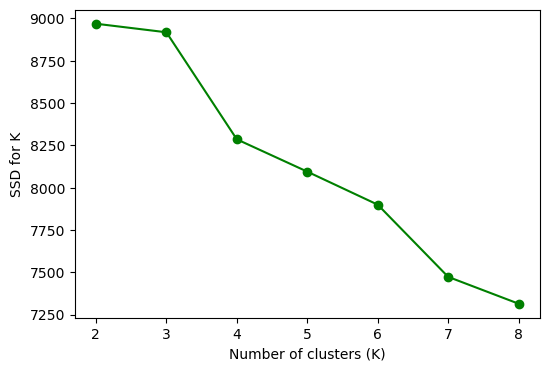

[8969.054664962488, 8918.500769782524, 8286.059617868043, 8095.141662518195, 7899.9696666660975, 7473.481950606681, 7314.887419471158]
Four is our ideal number of clusters, as there is a significant drop after three


In [4]:
# now using the elbow method to find the ideal number of clusters
# ssd == sum of least square error
ssd = []
# the range 2,9 are our possible k values
# in each iteration, we create a K-means clustering model with each value for k (2-8) and fit the model
# then we add its ssd to our empty list (inertia is ssd calculation)
# included a random state number for reproducibility
for k in range(2,9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_breast_cancer)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(6,4))
plt.plot(range(2,9), ssd, color='green', marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('SSD for K')
plt.show()
print(ssd)
print("Four is our ideal number of clusters, as there is a significant drop after three")

In [5]:
# fitting the KMeans with the ideal K value of 4
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_breast_cancer)

# adding clusters to the dataframe
numerical_breast_cancer_df['Cluster'] = clusters
numerical_breast_cancer_df.head()

,deg-malig,class_recurrence-events,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_lt40,menopause_premeno,tumor-size_10-14,...,node-caps_no,node-caps_yes,breast_right,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_yes,Cluster
0,3,False,True,False,False,False,False,False,True,False,...,True,False,False,False,True,False,False,False,False,0
1,2,False,False,True,False,False,False,False,True,False,...,True,False,True,False,False,False,False,True,False,0
2,2,False,False,True,False,False,False,False,True,False,...,True,False,False,False,True,False,False,False,False,0
3,2,False,False,False,False,True,False,False,False,False,...,True,False,True,False,False,True,False,False,False,2
4,2,False,False,True,False,False,False,False,True,False,...,True,False,True,False,False,False,True,False,False,0


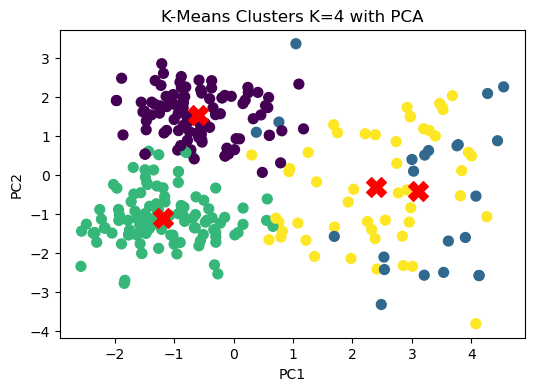

In [9]:
# now to plot the optimal clusters with their centroids
# since there are many dimensions (columns), i am importing PCA and transforming the data into 2 dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(scaled_breast_cancer)

# making the scatter plot
plt.figure(figsize=(6,4))
plt.scatter(x_pca[:,0], x_pca[:,1], c=clusters, cmap='viridis', s=50)
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], c='red', s=200, marker='X')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clusters K=4 with PCA')
plt.show()

# This plot shows the four clusters with their centroids. A huge variable here was the initial placement of the centroids.
# I experimented with many different random_state integers and that number completely changed how the plot turned out.
# This final result looks decent for the purple and green categories, but is a little messier in the blue and yellow.
# After some searching, it seems that a difficulty with this data is how multi-dimentional it is. Applying it to PCA and
# transforming it seems to have damaged some of the data and lessened integrity. This assignment was an intro to practicing with
# K-means, but definitely could use more expertise and fine tuning.